## EchoNet Dyanimc Dataset Usage

### Importing Basic Libraries

In [3]:
import sys
import os

# to import EchoNetDataset class from dataset_echonet file
dataset_file_dir = os.path.abspath('../dataset')
sys.path.append(dataset_file_dir)
from dataset_echonet import EchoNetDataset

# to import PreProcess from 'model' file
model_dir = os.path.abspath('../model')
sys.path.append(model_dir)
from pre_processing import PreProcessor

# to import load config files
utils_dir = os.path.abspath('../utils')
sys.path.append(utils_dir)
from handling_yaml import load_config_file

import numpy as np
import matplotlib.pyplot as plt

### Create Train, Validation, Test Data Generators

#### __Config File Parameters__:
* batch_size: 8
* to_fit: True
* shuffle: True
* seed: 101
*__echonet_dynamic_dataset:__
    * target_dataset_name: "echo_net_dynamic"
    * dataset_dir: "D:/AIMedic/FinalProject_echocardiogram/echoC_Dataset/echonet_dynamic/EchoNet-Dynamic"
    * info_df_dir: "info_df.csv"
    * dataset_features:
        * stage: ["ES", "ED"]
        * view: ["4CH"]

In [4]:
config_path = "../config/config_example_echonet.yaml"
config = load_config_file(config_path)
dataset = EchoNetDataset(config)

train_gen, val_gen, n_iter_train, n_iter_val = dataset.create_data_generators()
test_gen, n_iter_test = dataset.create_test_data_generator()

In [5]:
print('Number of train set batches: ', n_iter_train)
print('Number of validation set batches: ', n_iter_val)
print('number of test set batches: ', n_iter_test)

Number of train set batches:  1865
Number of validation set batches:  322
number of test set batches:  319


### Random Visualization 

image_shape:  (112, 112, 1)
label_shape:  (112, 112)


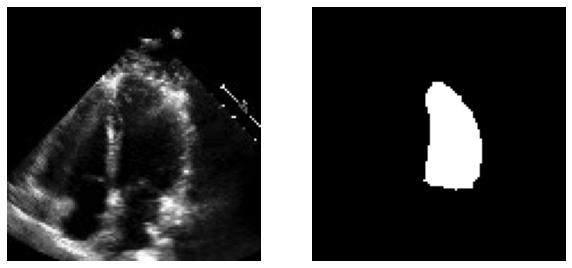

In [18]:
train_gen.random_visualization()

### Raw DataFrame
__( Information of all the dataset )__

In [19]:
dataset.raw_df

,case_id,mhd_image_filename,raw_image_filename,mhd_label_filename,raw_label_filename,video_file_dir,view,stage,ed_frame,es_frame,lv_edv,lv_esv,lv_ef,num_of_frame,fps,status
0,0X100009310A3BD7FC,0X100009310A3BD7FC_ES.mhd,0X100009310A3BD7FC_ES.raw,0X100009310A3BD7FC_ES_gt.mhd,0X100009310A3BD7FC_ES_gt.raw,Videos/0X100009310A3BD7FC.avi,4CH,ES,46,61,69.210534,14.881368,78.498406,174,50,VAL
1,0X100009310A3BD7FC,0X100009310A3BD7FC_ED.mhd,0X100009310A3BD7FC_ED.raw,0X100009310A3BD7FC_ED_gt.mhd,0X100009310A3BD7FC_ED_gt.raw,Videos/0X100009310A3BD7FC.avi,4CH,ED,46,61,69.210534,14.881368,78.498406,174,50,VAL
2,0X1002E8FBACD08477,0X1002E8FBACD08477_ES.mhd,0X1002E8FBACD08477_ES.raw,0X1002E8FBACD08477_ES_gt.mhd,0X1002E8FBACD08477_ES_gt.raw,Videos/0X1002E8FBACD08477.avi,4CH,ES,3,18,98.742884,40.383876,59.101988,215,50,TRAIN
3,0X1002E8FBACD08477,0X1002E8FBACD08477_ED.mhd,0X1002E8FBACD08477_ED.raw,0X1002E8FBACD08477_ED_gt.mhd,0X1002E8FBACD08477_ED_gt.raw,Videos/0X1002E8FBACD08477.avi,4CH,ED,3,18,98.742884,40.383876,59.101988,215,50,TRAIN
4,0X1005D03EED19C65B,0X1005D03EED19C65B_ES.mhd,0X1005D03EED19C65B_ES.raw,0X1005D03EED19C65B_ES_gt.mhd,0X1005D03EED19C65B_ES_gt.raw,Videos/0X1005D03EED19C65B.avi,4CH,ES,24,35,37.909734,14.267784,62.363798,104,50,TRAIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20043,0XFE6E32991136338,0XFE6E32991136338_ED.mhd,0XFE6E32991136338_ED.raw,0XFE6E32991136338_ED_gt.mhd,0XFE6E32991136338_ED_gt.raw,Videos/0XFE6E32991136338.avi,4CH,ED,31,45,168.207364,113.063526,32.783248,120,43,TEST
20044,0XFE83FF3D3B13C3A,0XFE83FF3D3B13C3A_ES.mhd,0XFE83FF3D3B13C3A_ES.raw,0XFE83FF3D3B13C3A_ES_gt.mhd,0XFE83FF3D3B13C3A_ES_gt.raw,Videos/0XFE83FF3D3B13C3A.avi,4CH,ES,49,67,38.187097,13.714901,64.084988,192,50,VAL
20045,0XFE83FF3D3B13C3A,0XFE83FF3D3B13C3A_ED.mhd,0XFE83FF3D3B13C3A_ED.raw,0XFE83FF3D3B13C3A_ED_gt.mhd,0XFE83FF3D3B13C3A_ED_gt.raw,Videos/0XFE83FF3D3B13C3A.avi,4CH,ED,49,67,38.187097,13.714901,64.084988,192,50,VAL
20046,0XFEBEEFF93F6FEB9,0XFEBEEFF93F6FEB9_ES.mhd,0XFEBEEFF93F6FEB9_ES.raw,0XFEBEEFF93F6FEB9_ES_gt.mhd,0XFEBEEFF93F6FEB9_ES_gt.raw,Videos/0XFEBEEFF93F6FEB9.avi,4CH,ES,25,38,86.770197,60.366313,30.429669,109,50,TRAIN


### Train DataFrame

In [20]:
dataset.train_df_

,case_id,mhd_image_filename,raw_image_filename,mhd_label_filename,raw_label_filename,video_file_dir,view,stage,ed_frame,es_frame,lv_edv,lv_esv,lv_ef,num_of_frame,fps,status,image_path,label_path
2,0X1002E8FBACD08477,0X1002E8FBACD08477_ES.mhd,0X1002E8FBACD08477_ES.raw,0X1002E8FBACD08477_ES_gt.mhd,0X1002E8FBACD08477_ES_gt.raw,Videos/0X1002E8FBACD08477.avi,4CH,ES,3,18,98.742884,40.383876,59.101988,215,50,TRAIN,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
3,0X1002E8FBACD08477,0X1002E8FBACD08477_ED.mhd,0X1002E8FBACD08477_ED.raw,0X1002E8FBACD08477_ED_gt.mhd,0X1002E8FBACD08477_ED_gt.raw,Videos/0X1002E8FBACD08477.avi,4CH,ED,3,18,98.742884,40.383876,59.101988,215,50,TRAIN,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
4,0X1005D03EED19C65B,0X1005D03EED19C65B_ES.mhd,0X1005D03EED19C65B_ES.raw,0X1005D03EED19C65B_ES_gt.mhd,0X1005D03EED19C65B_ES_gt.raw,Videos/0X1005D03EED19C65B.avi,4CH,ES,24,35,37.909734,14.267784,62.363798,104,50,TRAIN,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
5,0X1005D03EED19C65B,0X1005D03EED19C65B_ED.mhd,0X1005D03EED19C65B_ED.raw,0X1005D03EED19C65B_ED_gt.mhd,0X1005D03EED19C65B_ED_gt.raw,Videos/0X1005D03EED19C65B.avi,4CH,ED,24,35,37.909734,14.267784,62.363798,104,50,TRAIN,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
6,0X10075961BC11C88E,0X10075961BC11C88E_ES.mhd,0X10075961BC11C88E_ES.raw,0X10075961BC11C88E_ES_gt.mhd,0X10075961BC11C88E_ES_gt.raw,Videos/0X10075961BC11C88E.avi,4CH,ES,91,108,72.914210,33.143084,54.545097,122,55,TRAIN,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20039,0XFDFBA5702E94ABF,0XFDFBA5702E94ABF_ED.mhd,0XFDFBA5702E94ABF_ED.raw,0XFDFBA5702E94ABF_ED_gt.mhd,0XFDFBA5702E94ABF_ED_gt.raw,Videos/0XFDFBA5702E94ABF.avi,4CH,ED,100,117,86.781046,40.224359,53.648451,192,62,TRAIN,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
20040,0XFDFD17B7CCFE5AF,0XFDFD17B7CCFE5AF_ES.mhd,0XFDFD17B7CCFE5AF_ES.raw,0XFDFD17B7CCFE5AF_ES_gt.mhd,0XFDFD17B7CCFE5AF_ES_gt.raw,Videos/0XFDFD17B7CCFE5AF.avi,4CH,ES,66,85,77.284229,28.333805,63.338180,268,50,TRAIN,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
20041,0XFDFD17B7CCFE5AF,0XFDFD17B7CCFE5AF_ED.mhd,0XFDFD17B7CCFE5AF_ED.raw,0XFDFD17B7CCFE5AF_ED_gt.mhd,0XFDFD17B7CCFE5AF_ED_gt.raw,Videos/0XFDFD17B7CCFE5AF.avi,4CH,ED,66,85,77.284229,28.333805,63.338180,268,50,TRAIN,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
20046,0XFEBEEFF93F6FEB9,0XFEBEEFF93F6FEB9_ES.mhd,0XFEBEEFF93F6FEB9_ES.raw,0XFEBEEFF93F6FEB9_ES_gt.mhd,0XFEBEEFF93F6FEB9_ES_gt.raw,Videos/0XFEBEEFF93F6FEB9.avi,4CH,ES,25,38,86.770197,60.366313,30.429669,109,50,TRAIN,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...


### Validation DataFrame

In [21]:
dataset.val_df_

,case_id,mhd_image_filename,raw_image_filename,mhd_label_filename,raw_label_filename,video_file_dir,view,stage,ed_frame,es_frame,lv_edv,lv_esv,lv_ef,num_of_frame,fps,status,image_path,label_path
0,0X100009310A3BD7FC,0X100009310A3BD7FC_ES.mhd,0X100009310A3BD7FC_ES.raw,0X100009310A3BD7FC_ES_gt.mhd,0X100009310A3BD7FC_ES_gt.raw,Videos/0X100009310A3BD7FC.avi,4CH,ES,46,61,69.210534,14.881368,78.498406,174,50,VAL,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
1,0X100009310A3BD7FC,0X100009310A3BD7FC_ED.mhd,0X100009310A3BD7FC_ED.raw,0X100009310A3BD7FC_ED_gt.mhd,0X100009310A3BD7FC_ED_gt.raw,Videos/0X100009310A3BD7FC.avi,4CH,ED,46,61,69.210534,14.881368,78.498406,174,50,VAL,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
8,0X10094BA0A028EAC3,0X10094BA0A028EAC3_ES.mhd,0X10094BA0A028EAC3_ES.raw,0X10094BA0A028EAC3_ES_gt.mhd,0X10094BA0A028EAC3_ES_gt.raw,Videos/0X10094BA0A028EAC3.avi,4CH,ES,137,156,169.855024,127.581945,24.887742,207,52,VAL,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
9,0X10094BA0A028EAC3,0X10094BA0A028EAC3_ED.mhd,0X10094BA0A028EAC3_ED.raw,0X10094BA0A028EAC3_ED_gt.mhd,0X10094BA0A028EAC3_ED_gt.raw,Videos/0X10094BA0A028EAC3.avi,4CH,ED,137,156,169.855024,127.581945,24.887742,207,52,VAL,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
22,0X1013E8A4864781B,0X1013E8A4864781B_ES.mhd,0X1013E8A4864781B_ES.raw,0X1013E8A4864781B_ES_gt.mhd,0X1013E8A4864781B_ES_gt.raw,Videos/0X1013E8A4864781B.avi,4CH,ES,35,46,31.893505,9.822644,69.201743,140,47,VAL,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20029,0XFD06AD51C6DA6E5,0XFD06AD51C6DA6E5_ED.mhd,0XFD06AD51C6DA6E5_ED.raw,0XFD06AD51C6DA6E5_ED_gt.mhd,0XFD06AD51C6DA6E5_ED_gt.raw,Videos/0XFD06AD51C6DA6E5.avi,4CH,ED,47,62,117.657146,51.765664,56.002958,191,50,VAL,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
20034,0XFDB874C30A9C923,0XFDB874C30A9C923_ES.mhd,0XFDB874C30A9C923_ES.raw,0XFDB874C30A9C923_ES_gt.mhd,0XFDB874C30A9C923_ES_gt.raw,Videos/0XFDB874C30A9C923.avi,4CH,ES,53,73,143.839156,116.015036,19.343912,184,50,VAL,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
20035,0XFDB874C30A9C923,0XFDB874C30A9C923_ED.mhd,0XFDB874C30A9C923_ED.raw,0XFDB874C30A9C923_ED_gt.mhd,0XFDB874C30A9C923_ED_gt.raw,Videos/0XFDB874C30A9C923.avi,4CH,ED,53,73,143.839156,116.015036,19.343912,184,50,VAL,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
20044,0XFE83FF3D3B13C3A,0XFE83FF3D3B13C3A_ES.mhd,0XFE83FF3D3B13C3A_ES.raw,0XFE83FF3D3B13C3A_ES_gt.mhd,0XFE83FF3D3B13C3A_ES_gt.raw,Videos/0XFE83FF3D3B13C3A.avi,4CH,ES,49,67,38.187097,13.714901,64.084988,192,50,VAL,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...


### Test DataFrame

In [22]:
dataset.test_df_

,case_id,mhd_image_filename,raw_image_filename,mhd_label_filename,raw_label_filename,video_file_dir,view,stage,ed_frame,es_frame,lv_edv,lv_esv,lv_ef,num_of_frame,fps,status,image_path,label_path
10,0X100CF05D141FF143,0X100CF05D141FF143_ES.mhd,0X100CF05D141FF143_ES.raw,0X100CF05D141FF143_ES_gt.mhd,0X100CF05D141FF143_ES_gt.raw,Videos/0X100CF05D141FF143.avi,4CH,ES,132,148,107.731578,47.453831,55.951790,248,50,TEST,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
11,0X100CF05D141FF143,0X100CF05D141FF143_ED.mhd,0X100CF05D141FF143_ED.raw,0X100CF05D141FF143_ED_gt.mhd,0X100CF05D141FF143_ED_gt.raw,Videos/0X100CF05D141FF143.avi,4CH,ED,132,148,107.731578,47.453831,55.951790,248,50,TEST,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
20,0X1012703CDC1436FE,0X1012703CDC1436FE_ES.mhd,0X1012703CDC1436FE_ES.raw,0X1012703CDC1436FE_ES_gt.mhd,0X1012703CDC1436FE_ES_gt.raw,Videos/0X1012703CDC1436FE.avi,4CH,ES,154,172,121.011152,71.379125,41.014425,201,50,TEST,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
21,0X1012703CDC1436FE,0X1012703CDC1436FE_ED.mhd,0X1012703CDC1436FE_ED.raw,0X1012703CDC1436FE_ED_gt.mhd,0X1012703CDC1436FE_ED_gt.raw,Videos/0X1012703CDC1436FE.avi,4CH,ED,154,172,121.011152,71.379125,41.014425,201,50,TEST,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
38,0X102CFB07F752AAE6,0X102CFB07F752AAE6_ES.mhd,0X102CFB07F752AAE6_ES.raw,0X102CFB07F752AAE6_ES_gt.mhd,0X102CFB07F752AAE6_ES_gt.raw,Videos/0X102CFB07F752AAE6.avi,4CH,ES,163,184,68.990913,33.947173,50.794718,217,54,TEST,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,0XF6661AF354401A5,0XF6661AF354401A5_ED.mhd,0XF6661AF354401A5_ED.raw,0XF6661AF354401A5_ED_gt.mhd,0XF6661AF354401A5_ED_gt.raw,Videos/0XF6661AF354401A5.avi,4CH,ED,93,111,100.364020,35.298444,64.829583,221,50,TEST,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
19980,0XF829F634971A0F7,0XF829F634971A0F7_ES.mhd,0XF829F634971A0F7_ES.raw,0XF829F634971A0F7_ES_gt.mhd,0XF829F634971A0F7_ES_gt.raw,Videos/0XF829F634971A0F7.avi,4CH,ES,48,66,81.064211,28.270738,65.125501,183,50,TEST,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
19981,0XF829F634971A0F7,0XF829F634971A0F7_ED.mhd,0XF829F634971A0F7_ED.raw,0XF829F634971A0F7_ED_gt.mhd,0XF829F634971A0F7_ED_gt.raw,Videos/0XF829F634971A0F7.avi,4CH,ED,48,66,81.064211,28.270738,65.125501,183,50,TEST,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
20042,0XFE6E32991136338,0XFE6E32991136338_ES.mhd,0XFE6E32991136338_ES.raw,0XFE6E32991136338_ES_gt.mhd,0XFE6E32991136338_ES_gt.raw,Videos/0XFE6E32991136338.avi,4CH,ES,31,45,168.207364,113.063526,32.783248,120,43,TEST,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...


### Preprocessing Generators:
__( Applying augmentations just for train generator )__

In [23]:
pre_processor = PreProcessor(config)
train_gen = pre_processor.add_preprocess(train_gen, True)
val_gen = pre_processor.add_preprocess(val_gen, False)
test_gen = pre_processor.add_preprocess(test_gen, False)

#### Visualizing first element of 10 batches from train generator

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


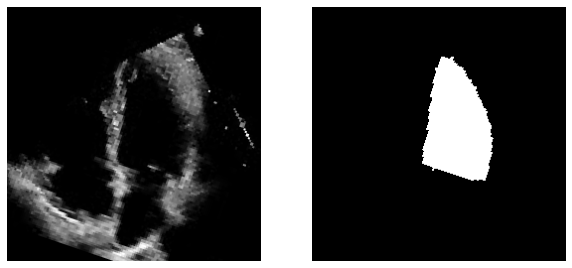

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


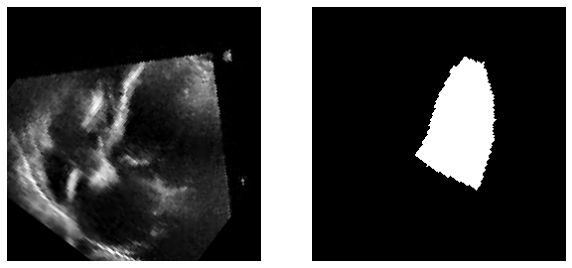

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.98039216
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


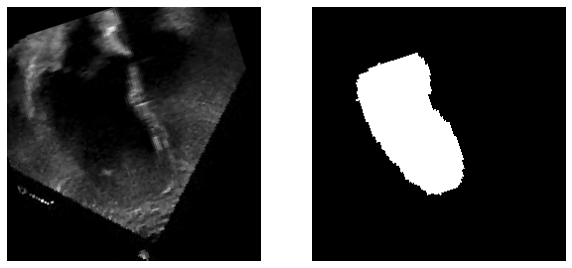

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.99215686
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


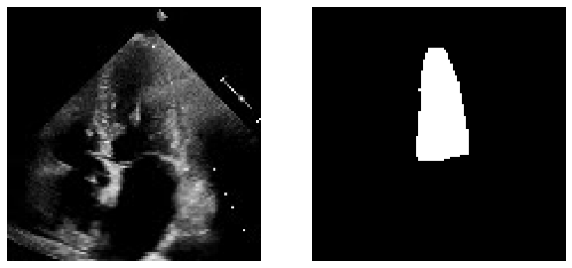

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


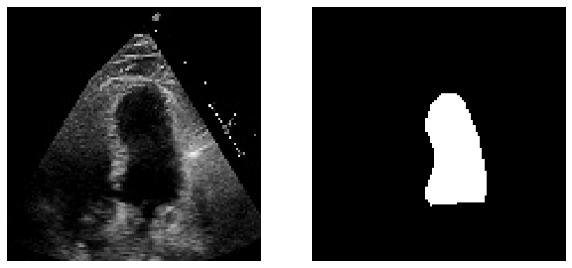

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


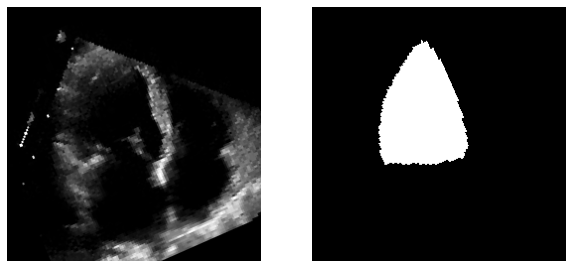

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.9921569
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


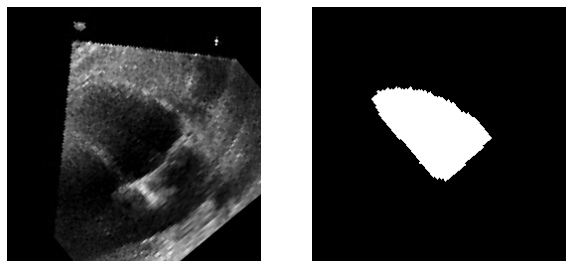

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.9960785
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


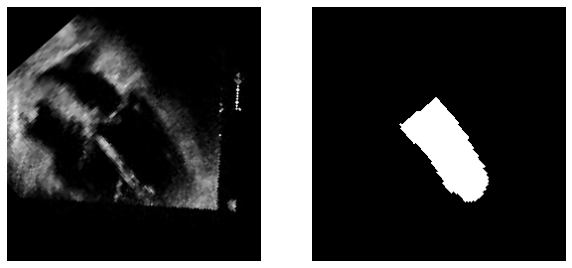

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


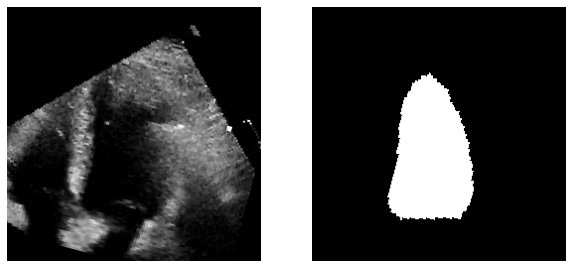

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.9803921
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


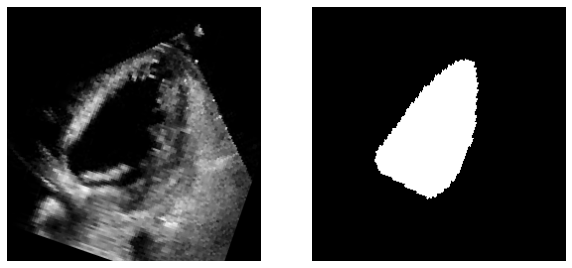

In [24]:
for i in range(10):
    item = next(train_gen)
    print("X_batch_dtype: ", item[0].dtype)
    print("y_batch_dtype: ", item[1].dtype)
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    print("image_shape: ", item[0][1].shape)
    print("image_type: ", type(item[0][1]))
    print("image_dtype: ", item[0][1].dtype)
    print("image_amax: ", np.amax(item[0][1]))
    ax[0].imshow(item[0][1], cmap='gray')
    ax[0].axis('off')
    print("label_shape: ", item[1][1].shape)
    print("label_type: ", type(item[1][1]))
    print("label_dtype: ", item[1][1].dtype)
    print("label_unique: ", np.unique(item[1][1]))
    ax[1].imshow(item[1][1], cmap='gray')
    ax[1].axis('off')
    plt.show()

#### Visualizing first element of 10 batches from test generator

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.9843137
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


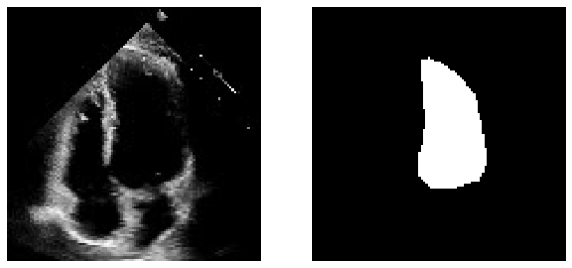

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


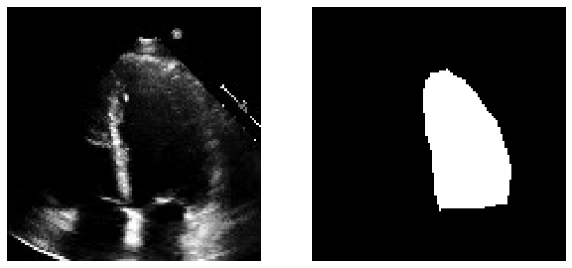

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


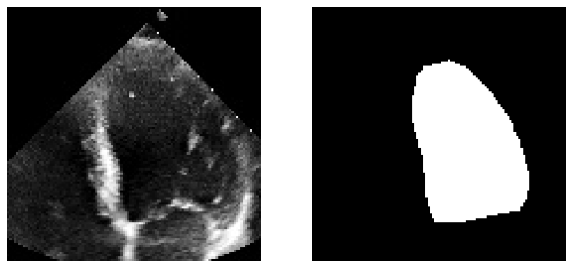

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


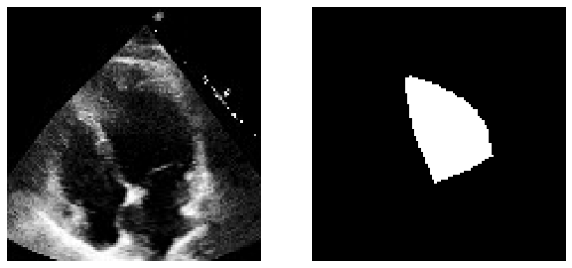

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


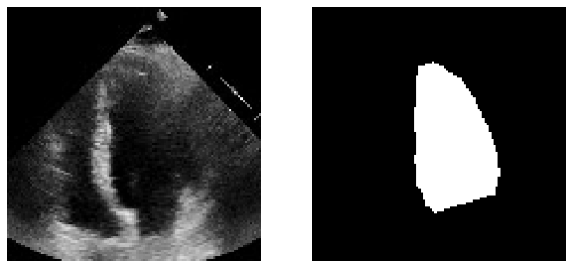

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


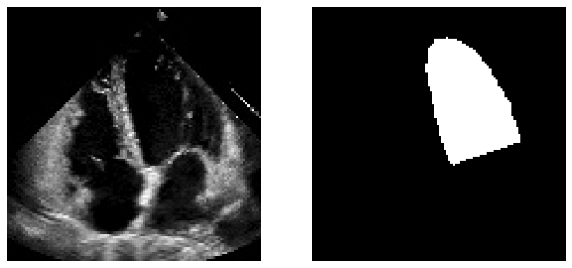

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


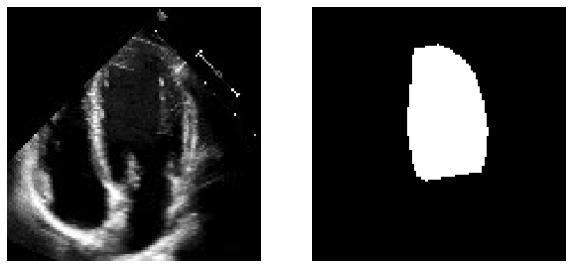

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


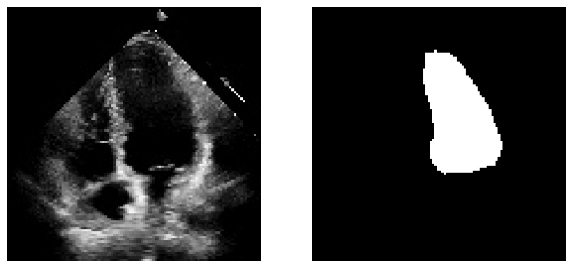

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


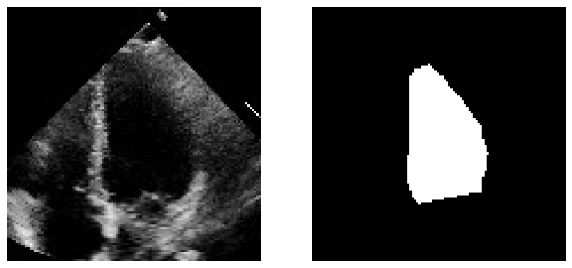

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


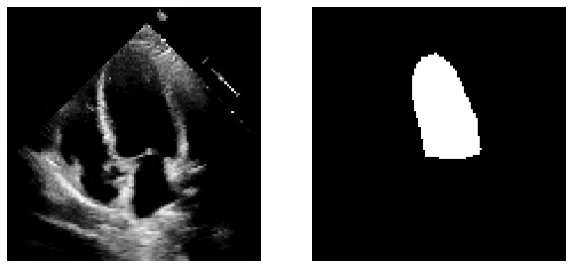

In [25]:
for i in range(10):
    item = next(test_gen)
    print("X_batch_dtype: ", item[0].dtype)
    print("y_batch_dtype: ", item[1].dtype)
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    print("image_shape: ", item[0][1].shape)
    print("image_type: ", type(item[0][1]))
    print("image_dtype: ", item[0][1].dtype)
    print("image_amax: ", np.amax(item[0][1]))
    ax[0].imshow(item[0][1], cmap='gray')
    ax[0].axis('off')
    print("label_shape: ", item[1][1].shape)
    print("label_type: ", type(item[1][1]))
    print("label_dtype: ", item[1][1].dtype)
    print("label_unique: ", np.unique(item[1][1]))
    ax[1].imshow(item[1][1], cmap='gray')
    ax[1].axis('off')
    plt.show()